In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


In [107]:
install = pd.read_csv('Datos\installs.csv.gzip',compression='gzip',engine='python')
install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


#  1. Analisis por Apps

## 1.1 Implicit Install

In [3]:
tabla1 = install[install['implicit'] == True]
aplicacion_T=tabla1['application_id'].value_counts()
tabla2 = install[install['implicit'] == False]
aplicacion_F=tabla2['application_id'].value_counts()

In [26]:
impTrue=pd.concat([aplicacion_T],axis=1)
impTrue.columns = ['aplicacion_id']

Text(0,0.5,'Cantidad')

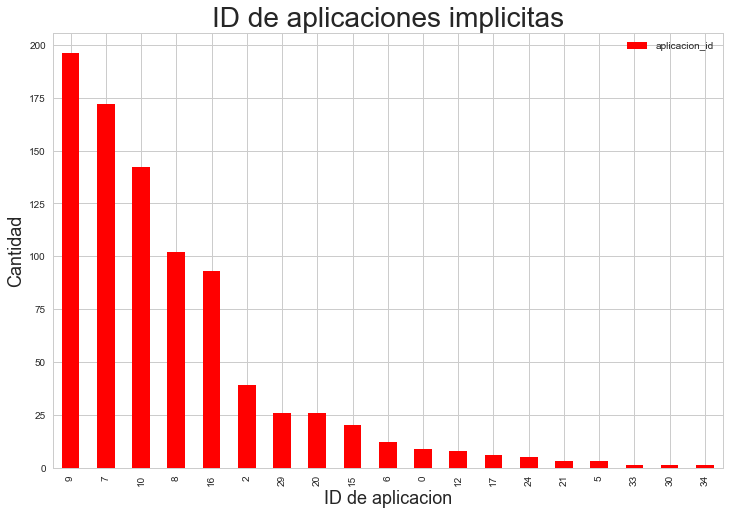

In [5]:
#Grafico de las aplicaciones con implicit = True

g = impTrue.plot.bar(color=["Red"],figsize=(12,8))
g.set_title("ID de aplicaciones implicitas", fontsize=28)
g.set_xlabel("ID de aplicacion",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)


In [6]:
impFalse=pd.concat([aplicacion_F],axis=1)
impFalse.columns = ['aplicacion_id']


Text(0,0.5,'Cantidad')

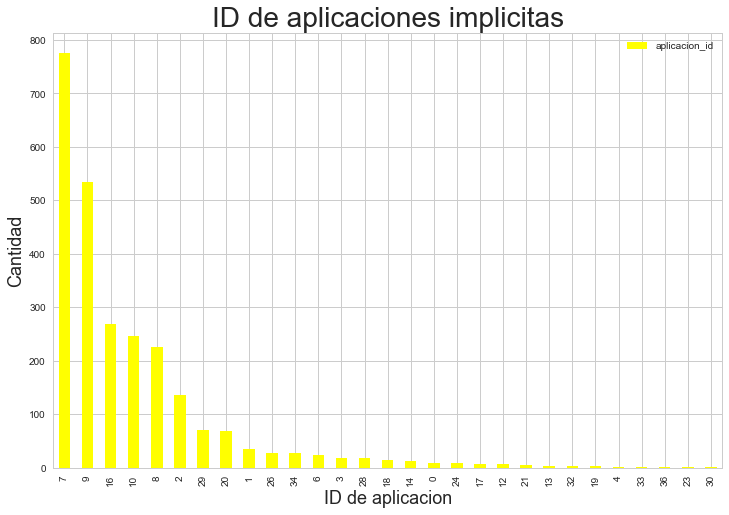

In [7]:
#Grafico de las aplicaciones con implicit = False

g = impFalse.plot.bar(color=["Yellow"],figsize=(12,8))
g.set_title("ID de aplicaciones implicitas", fontsize=28)
g.set_xlabel("ID de aplicacion",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)


In [8]:
impTrue['AppID_True'] = np.log(impTrue['aplicacion_id']+1)
impFalse['AppID_False'] = np.log(impFalse['aplicacion_id']+1)

impTotal = pd.concat([impFalse['AppID_False'],impTrue['AppID_True']],axis=1)
impTotal

,AppID_False,AppID_True
0,2.30,2.30
1,3.56,nan
2,4.91,3.69
3,2.89,nan
4,0.69,nan
5,nan,1.39
6,3.18,2.56
7,6.65,5.15
8,5.42,4.63
9,6.28,5.28


Text(0.5,0,'App ID')

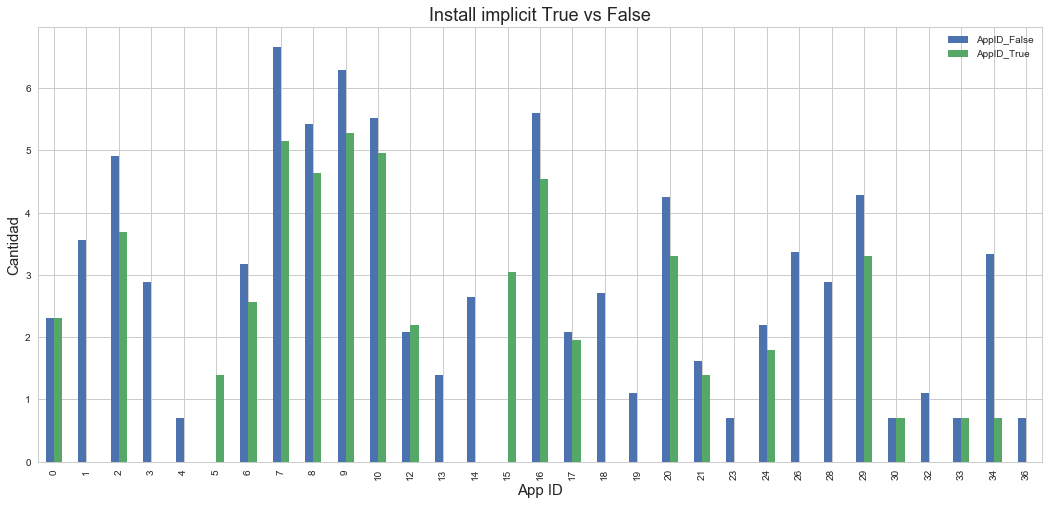

In [9]:
# Grafico de barras de installs por ID de Apps segun implicit

g = impTotal.plot.bar(figsize = (18,8))
g.set_title("Install implicit True vs False",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [10]:
# Atributed es cuando la instalación se le atribuye a Jampp
tablaAtributed2 = install[install['attributed'] == False]
attributed_F=tablaAtributed2['application_id'].value_counts()
attFalse=pd.concat([attributed_F],axis=1)
attFalse.columns = ['aplicacion_id']
attFalse['Att_False'] = np.log(attFalse['aplicacion_id']+1)

Text(0.5,0,'App ID')

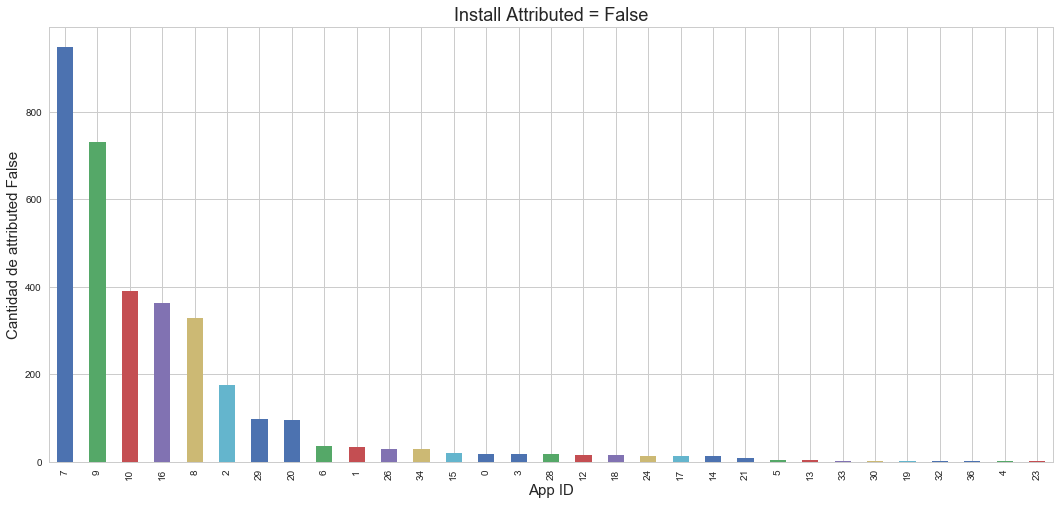

In [11]:
# TODOS los attributed son FALSE
# Grafico de barras de attributed por ID de Apps


g = attFalse['aplicacion_id'].plot.bar(figsize = (18,8))
g.set_title("Install Attributed = False",fontsize=18)
g.set_ylabel("Cantidad de attributed False",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [12]:
tablaWiFi_T = install[install['wifi'] == True]
wifi_T=tablaWiFi_T['application_id'].value_counts()
tablaWiFi_F = install[install['wifi'] == False]
wifi_F=tablaWiFi_F['application_id'].value_counts()


In [13]:
wifiTrue=pd.concat([wifi_T],axis=1)
wifiTrue.columns = ['Cant True']
wifiFalse=pd.concat([wifi_F],axis=1)
wifiFalse.columns = ['Cant False']
wifiTotal = pd.concat([wifiFalse['Cant False'],wifiTrue['Cant True']],axis=1)

Text(0.5,0,'App ID')

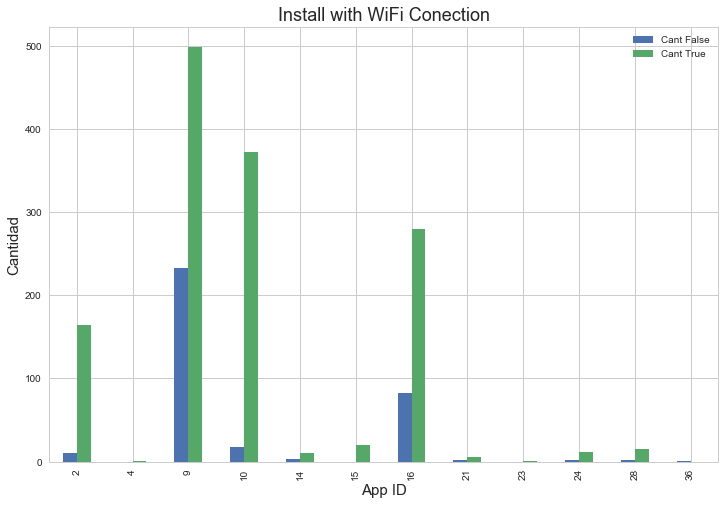

In [14]:

g = wifiTotal.plot.bar(figsize = (12,8))
g.set_title("Install with WiFi Conection",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [111]:
install['año'],install['mes'],install['dia']= install['created'].str.split(' ').str[0].str.split('-').str


In [115]:
install['compra'] = install['implicit']==True
for_heatmap = install.pivot_table(index='dia', columns='application_id', values='compra', aggfunc='sum')

Text(34,0.5,'Dias')

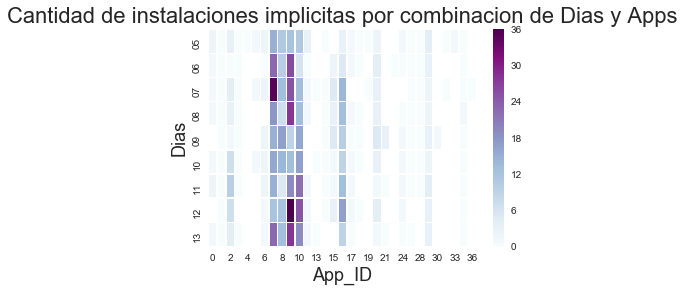

In [122]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de instalaciones implicitas por combinacion de Dias y Apps", fontsize=22)
g.set_xlabel("App_ID",fontsize=18)
g.set_ylabel("Dias", fontsize=18)

In [105]:
install['created'] = pd.to_datetime(install['created'], format='%Y/%m/%d %H:%M')
install['dia'] = pd.to_datetime(install['created']).dt.date
install['hora'] = pd.to_datetime(install['created']).dt.time

0       2019-03-13
1       2019-03-13
2       2019-03-13
3       2019-03-13
4       2019-03-10
5       2019-03-10
6       2019-03-11
7       2019-03-11
8       2019-03-11
9       2019-03-13
10      2019-03-13
11      2019-03-13
12      2019-03-13
13      2019-03-13
14      2019-03-13
15      2019-03-13
16      2019-03-13
17      2019-03-13
18      2019-03-13
19      2019-03-13
20      2019-03-13
21      2019-03-13
22      2019-03-13
23      2019-03-13
24      2019-03-13
25      2019-03-13
26      2019-03-09
27      2019-03-09
28      2019-03-09
29      2019-03-09
           ...    
3382    2019-03-05
3383    2019-03-05
3384    2019-03-05
3385    2019-03-05
3386    2019-03-08
3387    2019-03-08
3388    2019-03-08
3389    2019-03-07
3390    2019-03-08
3391    2019-03-08
3392    2019-03-08
3393    2019-03-08
3394    2019-03-08
3395    2019-03-07
3396    2019-03-07
3397    2019-03-07
3398    2019-03-07
3399    2019-03-07
3400    2019-03-07
3401    2019-03-07
3402    2019-03-07
3403    2019

In [22]:
install['dia'].value_counts()

2019-03-12    472
2019-03-13    423
2019-03-07    393
2019-03-11    377
2019-03-09    368
2019-03-08    366
2019-03-10    351
2019-03-05    337
2019-03-06    325
Name: dia, dtype: int64

In [17]:
#junto los días que tienen mas de dos fechas
lunes = install[install['dia'].astype('str')== '2019-03-11']

martes = install[install['dia'].astype('str')== '2019-03-05']
martes2= install[install['dia'].astype('str') == '2019-03-12']
martes.append(martes2)

miercoles = install[install['dia'].astype('str') == '2019-03-06']
miercoles2 = install[install['dia'].astype('str') == '2019-03-13']
miercoles.append(miercoles2)

jueves = install[install['dia'].astype('str')== '2019-03-07']

viernes= install[install['dia'].astype('str')== '2019-03-08']

sabado = install[install['dia'].astype('str')== '2019-03-09']

domingo = install[install['dia'].astype('str')== '2019-03-10']


In [20]:
cuentaDomingo = domingo['application_id'].value_counts()
dom = pd.concat([cuentaDomingo],axis=1)
dom.columns = ['CANT']

Text(0.5,0,'App ID')

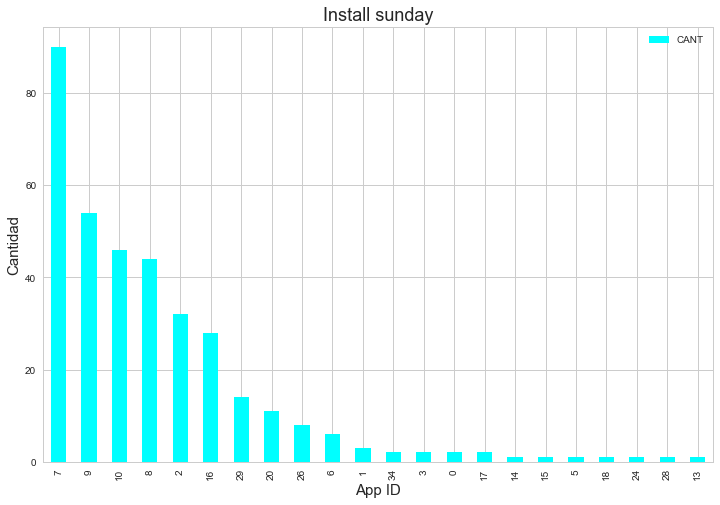

In [19]:
g = dom.plot.bar(figsize = (12,8),color=['cyan'])
g.set_title("Install sunday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)